In [ ]:
Лабораторна робота 4
ФБ-33 Дохоян Юлія

In [4]:
import os
import urllib.request
import urllib.error
import zipfile
import numpy as np  
import timeit
import pandas as pd
print("Налаштування завершено")

Налаштування завершено


In [5]:
SAVE_DIR = "/home/iulia/AD4"

def is_duplicate_file(directory, new_data):
    existing_files = os.listdir(directory)
    for file in existing_files:
        file_path = os.path.join(directory, file)
        if os.path.isfile(file_path):
            with open(file_path, 'rb') as existing_file:
                if existing_file.read() == new_data:
                    return True
    return False

def download_first_task():
    os.makedirs(SAVE_DIR, exist_ok=True)
    filename = 'individual+household+electric+power+consumption.zip'
    filepath = os.path.join(SAVE_DIR, filename)
    
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip'
    retries = 2
    
    for attempt in range(retries):
        try:
            with urllib.request.urlopen(url) as response:
                data = response.read()

            if not is_duplicate_file(SAVE_DIR, data):
                with open(filepath, 'wb') as file:
                    file.write(data)
                print(f"[+] Файл {filename} завантажено успішно!")
            else:
                print(f" Завантаження пропущено, файл уже існує.")
            break
        except urllib.error.URLError as e:
            print(f"[!] Помилка завантаження: {e}")
            if attempt == retries - 1:
                return  

    try:
        with zipfile.ZipFile(filepath, 'r') as zip_ref:
            extracted_files = zip_ref.namelist()

            if all(os.path.exists(os.path.join(SAVE_DIR, file)) for file in extracted_files):
                print(f"Файли вже розпаковані.")
                return

            zip_ref.extractall(SAVE_DIR)
            print(f"Архів розпаковано успішно!")
    except zipfile.BadZipFile:
        print(" Помилка: архів пошкоджений.")
        return

    print(f"Папка: {os.path.abspath(SAVE_DIR)}")
download_first_task()


 Завантаження пропущено, файл уже існує.
Файли вже розпаковані.


In [6]:
def df_creator():
    url_txt = "/home/iulia/AD4/household_power_consumption.txt"
    df = pd.read_csv(url_txt, sep=";", low_memory=False, na_values=['?'])
    df = df.dropna()  
    return df
def first_pd_df(df):
    df['datetime'] = pd.to_datetime(df['Date'].str.cat(df['Time'], sep=' '), format='%d/%m/%Y %H:%M:%S')
    df.drop(['Date', 'Time'], axis=1, inplace=True)
    print("Pandas dataframe створений успішно!")
    return df

def np_ar(df):
    numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
    df = df.copy()
    df[numeric_columns] = df[numeric_columns].astype(float)  
    df.dropna(inplace=True)  
    
    np_array = df.to_numpy() 
    print("Numpy array створений успішно!")
    return np_array


df = df_creator()
df_processed = first_pd_df(df)
np_array = np_ar(df)




Pandas dataframe створений успішно!
Numpy array створений успішно!


In [ ]:
Отже, спочатку виконаю завдання за допомогою pandas dataframe

In [7]:
df = df_creator()  
df = first_pd_df(df)  
print(df.head())  



Pandas dataframe створений успішно!
   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3            datetime  
0             0.0             1.0            17.0 2006-12-16 17:24:00  
1             0.0             1.0            16.0 2006-12-16 17:25:00  
2             0.0             2.0            17.0 2006-12-16 17:26:00  
3             0.0             1.0            17.0 2006-12-16 17:27:00  
4             0.0             1.0            17.0 2006-12-16 17:28:00  


Обрати всі записи, у яких загальна активна споживана потужність
перевищує 5 кВт.

In [8]:
import timeit

def task1():
    start_time = timeit.default_timer()
    result_pandas = df[df['Global_active_power'] > 5]
    count = result_pandas.shape[0]
    first_10 = result_pandas.head(10)
    end_time = timeit.default_timer()
    print(f"Час виконання : {end_time - start_time} секунд")
    print(f"Кількість записів, де global_active_power > 5: {count}")
    print(f"Перші 10 записів:\n{first_10}")
task1()



Час виконання : 0.005794710999907693 секунд
Кількість записів, де global_active_power > 5: 17547
Перші 10 записів:
    Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
1                 5.360                  0.436   233.63              23.0   
2                 5.374                  0.498   233.29              23.0   
3                 5.388                  0.502   233.74              23.0   
11                5.412                  0.470   232.78              23.2   
12                5.224                  0.478   232.99              22.4   
13                5.268                  0.398   232.91              22.6   
20                5.894                  0.000   232.69              25.4   
21                7.706                  0.000   230.98              33.2   
22                7.026                  0.000   232.21              30.6   
23                5.174                  0.000   234.19              22.0   

    Sub_metering_1  Sub_metering_2  S

In [ ]:
Обрати всі записи, де вольтаж перевищує 235.

In [9]:
def task2():
    start_time = timeit.default_timer()
    result_pandas_voltage = df[df['Voltage'] > 235]
    end_time = timeit.default_timer()

    print(f"Кількість записів >235 В: {len(result_pandas_voltage)}")
    print("Перші 5 записів:")
    print(result_pandas_voltage.head())
    print(f"Час виконання : {end_time - start_time} секунд")
task2()


Кількість записів >235 В: 1952491
Перші 5 записів:
    Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
4                 3.666                  0.528   235.68              15.8   
5                 3.520                  0.522   235.02              15.0   
6                 3.702                  0.520   235.09              15.8   
7                 3.700                  0.520   235.22              15.8   
14                4.054                  0.422   235.24              17.6   

    Sub_metering_1  Sub_metering_2  Sub_metering_3            datetime  
4              0.0             1.0            17.0 2006-12-16 17:28:00  
5              0.0             2.0            17.0 2006-12-16 17:29:00  
6              0.0             1.0            17.0 2006-12-16 17:30:00  
7              0.0             1.0            17.0 2006-12-16 17:31:00  
14             0.0             1.0            17.0 2006-12-16 17:38:00  
Час виконання : 0.38082172200006426 секунд


In [10]:
def task3():
    start_time = timeit.default_timer()
    filtered_df = df[(df['Global_intensity'] >= 19) & (df['Global_intensity'] <= 20)]
    result_pandas = filtered_df[filtered_df['Sub_metering_2'] > filtered_df['Sub_metering_3']]
    end_time = timeit.default_timer()
    print(f"Кількість записів: {len(result_pandas)}")
    print(result_pandas.head())
    print(f"Час виконання : {end_time - start_time} секунд")
task3()


Кількість записів: 2509
     Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
45                 4.464                  0.136   234.66              19.0   
460                4.582                  0.258   238.08              19.6   
464                4.618                  0.104   239.61              19.6   
475                4.636                  0.140   237.37              19.4   
476                4.634                  0.152   237.17              19.4   

     Sub_metering_1  Sub_metering_2  Sub_metering_3            datetime  
45              0.0            37.0            16.0 2006-12-16 18:09:00  
460             0.0            13.0             0.0 2006-12-17 01:04:00  
464             0.0            27.0             0.0 2006-12-17 01:08:00  
475             0.0            36.0             0.0 2006-12-17 01:19:00  
476             0.0            35.0             0.0 2006-12-17 01:20:00  
Час виконання : 0.006294038000078217 секунд


Обрати випадковим чином 500000 записів (без повторів елементів

вибірки), для них обчислити середні величини усіх 3-х груп

споживання електричної енергії

In [11]:
def task4(df, sample_size=500000):
    sample_df = df.sample(n=sample_size, replace=False, random_state=42)  
    avg_values = sample_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return avg_values
start_time_pd = timeit.default_timer()
average_consumption_pd = task4(df)  
end_time_pd = timeit.default_timer()

print("Середні величини споживання електроенергії :")
print(f"Sub_metering_1: {average_consumption_pd['Sub_metering_1']}")
print(f"Sub_metering_2: {average_consumption_pd['Sub_metering_2']}")
print(f"Sub_metering_3: {average_consumption_pd['Sub_metering_3']}")
print(f"Час виконання : {end_time_pd - start_time_pd:.4f} секунд")


Середні величини споживання електроенергії :
Sub_metering_1: 1.119258
Sub_metering_2: 1.308912
Sub_metering_3: 6.45295
Час виконання : 0.1565 секунд


Обрати ті записи, які після 18-00 споживають понад 6 кВт за
хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [14]:
def task5(df):
    df = df[df['datetime'].dt.hour >= 18]  
    df = df[df['Global_active_power'] > 6]
    df = df[df['Sub_metering_2'] > df['Sub_metering_1']]
    df = df[df['Sub_metering_2'] > df['Sub_metering_3']]
    n = len(df)
    first_half = df.iloc[:n//2]
    second_half = df.iloc[n//2:]
    selected_first_half = first_half.iloc[::3]  
    selected_second_half = second_half.iloc[::4]  
    selected_households = pd.concat([selected_first_half, selected_second_half])
    return selected_households

start_time = timeit.default_timer()
result_task5df = task5(df)  
end_time = timeit.default_timer()
time_task_df = end_time - start_time

print(f"Кількість відібраних домогосподарств: {len(result_task5df)}")
print(f"Час виконання: {time_task_df:.4f} секунд")
result_task5df.head()




Кількість відібраних домогосподарств: 310
Час виконання: 0.0687 секунд


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
41,6.052,0.192,232.93,26.2,0.0,37.0,17.0,2006-12-16 18:05:00
44,6.308,0.116,232.25,27.0,0.0,36.0,17.0,2006-12-16 18:08:00
17494,6.386,0.374,236.63,27.0,1.0,36.0,17.0,2006-12-28 20:58:00
17498,8.088,0.262,235.50,34.4,1.0,72.0,17.0,2006-12-28 21:02:00
17501,7.230,0.152,235.22,30.6,1.0,73.0,17.0,2006-12-28 21:05:00


Тепер виконаємо аналогічні дії за до допомогою numpy array

In [68]:
def task1_1():
    start_time = timeit.default_timer()
    filtered_array = np_array[np_array[:, 0] > 5]  
    end_time = timeit.default_timer()
    sum_time= end_time- start_time 
    print(f"Кількість записів з Global_active_power > 5: {len(filtered_array)}")
    print(f"Час підрахунку: {sum_time:.6f} секунд")
    print(filtered_array)

task1_1()

Кількість записів з Global_active_power > 5: 17547
Час підрахунку: 0.066779 секунд
[[5.36 0.436 233.63 ... 1.0 16.0 Timestamp('2006-12-16 17:25:00')]
 [5.374 0.498 233.29 ... 2.0 17.0 Timestamp('2006-12-16 17:26:00')]
 [5.388 0.502 233.74 ... 1.0 17.0 Timestamp('2006-12-16 17:27:00')]
 ...
 [5.172 0.05 235.18 ... 38.0 17.0 Timestamp('2010-11-24 07:50:00')]
 [5.75 0.0 234.4 ... 39.0 17.0 Timestamp('2010-11-24 07:51:00')]
 [5.074 0.24 238.55 ... 2.0 18.0 Timestamp('2010-11-25 07:21:00')]]


In [69]:
def task2_1():
    start_time = timeit.default_timer()
    filtered_array2 = np_array[np_array[:, 2] > 235]  
    end_time = timeit.default_timer()
    sum_time= end_time- start_time 
    print(f"Кількість записів з Global_active_power > 5: {len(filtered_array2)}")
    print(f"Час підрахунку: {sum_time:.6f} секунд")
    print(filtered_array2)

task2_1()

Кількість записів з Global_active_power > 5: 1952491
Час підрахунку: 0.282987 секунд
[[3.666 0.528 235.68 ... 1.0 17.0 Timestamp('2006-12-16 17:28:00')]
 [3.52 0.522 235.02 ... 2.0 17.0 Timestamp('2006-12-16 17:29:00')]
 [3.702 0.52 235.09 ... 1.0 17.0 Timestamp('2006-12-16 17:30:00')]
 ...
 [0.938 0.0 239.82 ... 0.0 0.0 Timestamp('2010-11-26 21:00:00')]
 [0.934 0.0 239.7 ... 0.0 0.0 Timestamp('2010-11-26 21:01:00')]
 [0.932 0.0 239.55 ... 0.0 0.0 Timestamp('2010-11-26 21:02:00')]]


In [75]:
def task3_2(np_array):
    start_time = timeit.default_timer()
    filtered_data = np_array[(np_array[:, 4] >= 19) & (np_array[:, 4] <= 20)] 
    result = filtered_data[(filtered_data[:, 6] > filtered_data[:, 5])] 
    end_time = timeit.default_timer()
    sum_time= end_time- start_time 
    print(f"Час підрахунку: {sum_time:.6f} секунд")
    return result
filtered_result = task3_2(np_array)
print(filtered_result[:5])

Час підрахунку: 0.079417 секунд
[[6.906 0.078 231.03 30.4 20.0 0.0 16.0 Timestamp('2006-12-22 21:27:00')]
 [2.582 0.0 240.86 11.6 20.0 0.0 18.0 Timestamp('2006-12-28 09:16:00')]
 [4.362 0.386 235.06 19.2 19.0 2.0 17.0 Timestamp('2007-01-13 11:14:00')]
 [2.382 0.078 236.72 11.0 20.0 0.0 17.0 Timestamp('2007-01-15 10:25:00')]
 [2.604 0.146 237.55 11.8 19.0 0.0 17.0 Timestamp('2007-01-19 08:19:00')]]


In [80]:
def task4_2():
    start_time4 = timeit.default_timer()
    random_indices = np.random.choice(np_array.shape[0], size=500_000, replace=False)
    sample = np_array[random_indices]
    sub_metering_1_col = 4
    sub_metering_2_col = 5
    sub_metering_3_col = 6
    avg_sub1 = np.mean(sample[:, sub_metering_1_col])
    avg_sub2 = np.mean(sample[:, sub_metering_2_col])
    avg_sub3 = np.mean(sample[:, sub_metering_3_col])
    end_time4 = timeit.default_timer()
    sum_time4 = end_time4 - start_time4 
    
    print(f"Середнє значення Sub_metering_1: {avg_sub1:.2f}")
    print(f"Середнє значення Sub_metering_2: {avg_sub2:.2f}")
    print(f"Середнє значення Sub_metering_3: {avg_sub3:.2f}")
    print(f"Час підрахунку: {sum_time4:.6f} секунд")
    
task4_2()

Середнє значення Sub_metering_1: 1.11
Середнє значення Sub_metering_2: 1.30
Середнє значення Sub_metering_3: 6.45
Час підрахунку: 0.461688 секунд


In [90]:
def task5_2(np_array):
    start_time4 = timeit.default_timer()
    datetime_column = np_array[:, -1]
    hours = np.array([dt.hour for dt in datetime_column])
    time_filtered = np_array[hours >= 18]
    power_filtered = time_filtered[time_filtered[:, 0].astype(float) > 6]
    sm1 = power_filtered[:, 4]
    sm2 = power_filtered[:, 5]
    sm3 = power_filtered[:, 6]
    group2_dominant = power_filtered[(sm2 > sm1) & (sm2 > sm3)]
    midpoint = len(group2_dominant) // 2
    first_half = group2_dominant[:midpoint]
    second_half = group2_dominant[midpoint:]
    selected_first = first_half[::3]
    selected_second = second_half[::4]
    final_result = np.vstack((selected_first, selected_second))
    end_time4 = timeit.default_timer()
    sum_time4 = end_time4 - start_time4 
    print(f"Час підрахунку: {sum_time4:.6f} секунд")
    return final_result
filtered_final = task5_2(np_array)
print(f"Кількість знайдених записів: {len(filtered_final)}")



Час підрахунку: 0.244956 секунд
Кількість знайдених записів: 310


Виконавши завдання двома способами, можу сказати, що для мене було більш зручно працювати з pandas dataframe. Порівнюючи час виконання він також є швидший ніж в nampy array. Тому моя оцінка така pandas dataframe-5, nampy array-3.

Частина 2

In [92]:
SAVE_DIR = "/home/iulia/AD4"

def is_duplicate_file(directory, new_data):
    existing_files = os.listdir(directory)
    for file in existing_files:
        file_path = os.path.join(directory, file)
        if os.path.isfile(file_path):
            with open(file_path, 'rb') as existing_file:
                if existing_file.read() == new_data:
                    return True
    return False

def download_first_task():
    os.makedirs(SAVE_DIR, exist_ok=True)
    filename = 'auto+mpg.zip'
    filepath = os.path.join(SAVE_DIR, filename)
    url = "https://archive.ics.uci.edu/static/public/9/auto+mpg.zip"
    retries = 2
    
    for attempt in range(retries):
        try:
            with urllib.request.urlopen(url) as response:
                data = response.read()

            if not is_duplicate_file(SAVE_DIR, data):
                with open(filepath, 'wb') as file:
                    file.write(data)
                print(f"[+] Файл {filename} завантажено успішно!")
            else:
                print(f" Завантаження пропущено, файл уже існує.")
            break
        except urllib.error.URLError as e:
            print(f"[!] Помилка завантаження: {e}")
            if attempt == retries - 1:
                return  

    try:
        with zipfile.ZipFile(filepath, 'r') as zip_ref:
            extracted_files = zip_ref.namelist()

            if all(os.path.exists(os.path.join(SAVE_DIR, file)) for file in extracted_files):
                print(f"Файли вже розпаковані.")
                return

            zip_ref.extractall(SAVE_DIR)
            print(f"Архів розпаковано успішно!")
    except zipfile.BadZipFile:
        print(" Помилка: архів пошкоджений.")
        return

    print(f"Папка: {os.path.abspath(SAVE_DIR)}")
download_first_task()

[+] Файл auto+mpg.zip завантажено успішно!
Архів розпаковано успішно!
Папка: /home/iulia/AD4


In [158]:
def data_fr():
    df = pd.read_csv(
        '/home/iulia/AD4/auto-mpg.data',
        delim_whitespace=True,        
        header=None,
        na_values='?',                
        names=[
            'mpg', 'cylinders', 'displacement', 'horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'car_name'
        ]
    )
    print(f"=] Датафрейм успішно створено.")
    print(f"=] Кількість рядків: {len(df)}")
    return df

=] Датафрейм успішно створено.
=] Кількість рядків: 398
horsepower      6
mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


/tmp/ipykernel_9530/3154193645.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


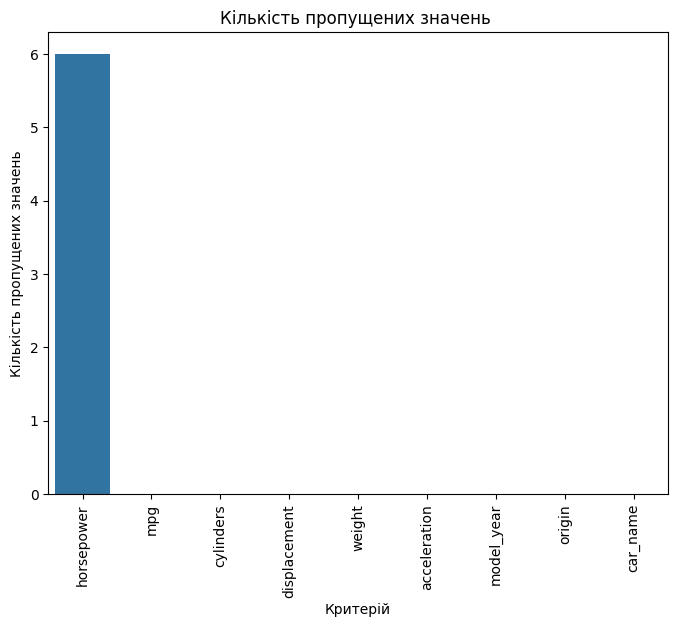

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
df = data_fr()
missing_values = df.isnull().sum()
sorted_missing = missing_values.sort_values(ascending=False)
print(sorted_missing)

plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_missing.index, y=sorted_missing.values)
plt.xticks(rotation=90)
plt.title("Кількість пропущених значень ")
plt.xlabel("Критерій")
plt.ylabel("Кількість пропущених значень")
plt.show()



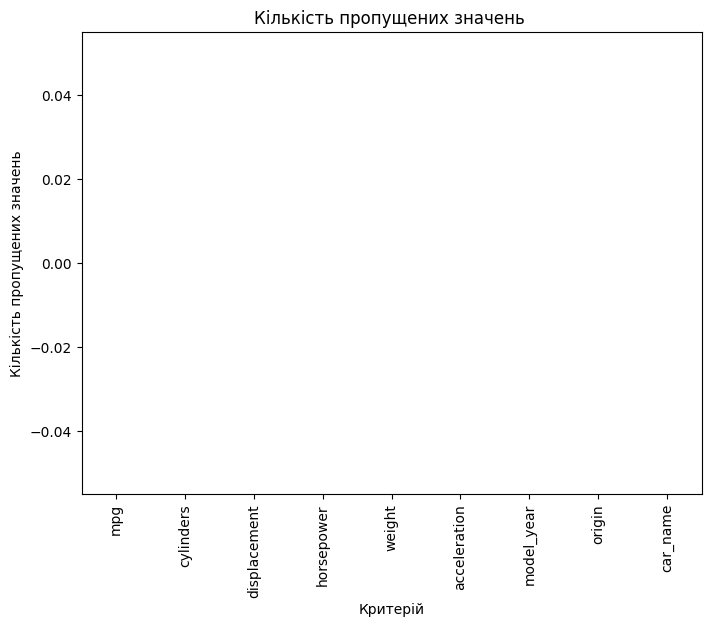

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [160]:
def fillna_clearing(df):
    df = df.fillna(df.mean(numeric_only=True))
    missing_values = df.isnull().sum()
    sorted_missing = missing_values.sort_values(ascending=False)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=sorted_missing.index, y=sorted_missing.values)
    plt.xticks(rotation=90)
    plt.title("Кількість пропущених значень ")
    plt.xlabel("Критерій")
    plt.ylabel("Кількість пропущених значень")
    plt.show()

    return df
fillna_clearing(df)

In [161]:
def normalize(col):
    return (col - col.min())/(col.max() - col.min())
def standardize(col):
    return (col - col.mean()) / col.std()
for col in df.columns:
    if col != 'car_name':  
        df[col] = pd.to_numeric(df[col], errors='coerce')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    df[f'norm_{col}'] = normalize(df[col])
    df[f'std_{col}'] = standardize(df[col])

print(f" Нормалізація та стандартизація завершена.")

print(f"Нормалізовані : min = {df['norm_mpg'].min()}, max = {df['norm_mpg'].max()}")
print(f"Стандартизовані : mean = {df['std_mpg'].mean()}, max = {df['std_mpg'].std()}")


 Нормалізація та стандартизація завершена.
Нормалізовані : min = 0.0, max = 1.0
Стандартизовані : mean = 1.0711699534071862e-16, max = 0.9999999999999999


In [162]:
print(df.columns)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name', 'norm_mpg',
       'std_mpg', 'norm_cylinders', 'std_cylinders', 'norm_displacement',
       'std_displacement', 'norm_horsepower', 'std_horsepower', 'norm_weight',
       'std_weight', 'norm_acceleration', 'std_acceleration',
       'norm_model_year', 'std_model_year', 'norm_origin', 'std_origin'],
      dtype='object')


<Figure size 1200x400 with 0 Axes>

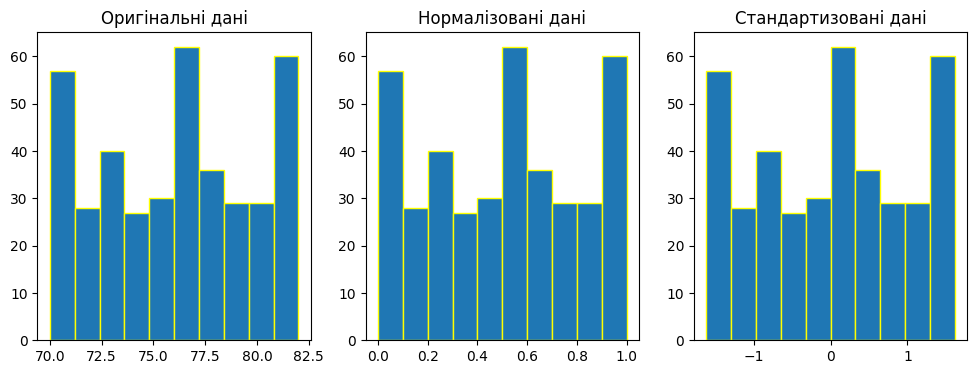

In [170]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 4))
columns = ['model_year', 'norm_model_year', 'std_model_year']
titles = ['Оригінальні дані', 'Нормалізовані дані', 'Стандартизовані дані']

plt.figure(figsize=(12, 4))

for i, col in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    df[col].hist(edgecolor="yellow")
    plt.title(titles[i])
    plt.grid(False)
plt.show()


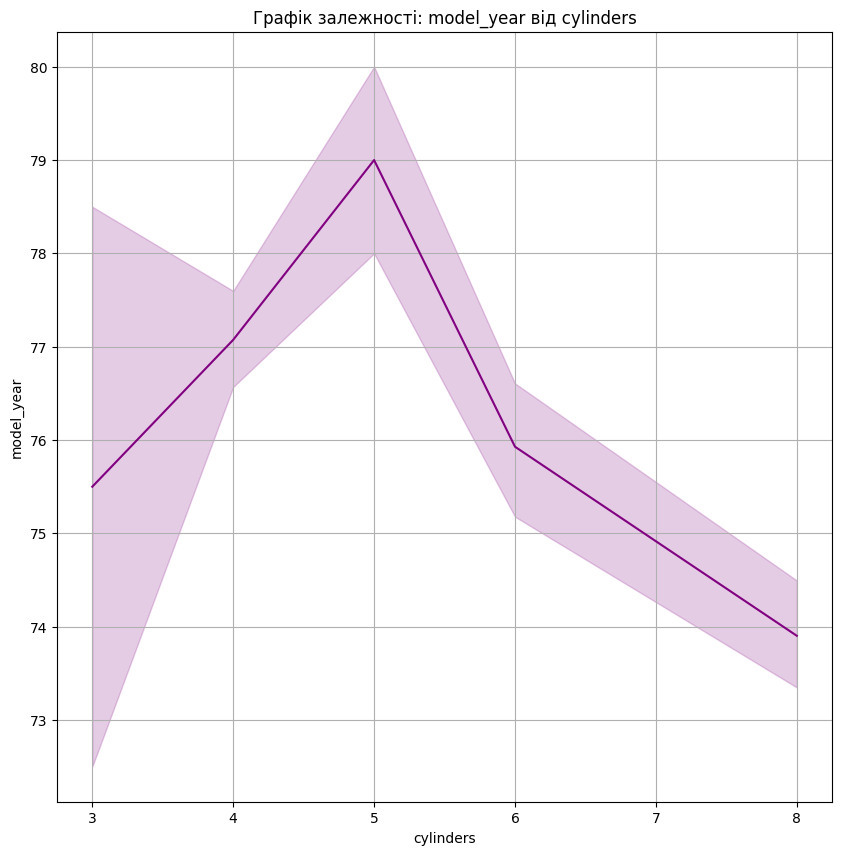

In [184]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df, x='cylinders', y='model_year', color='purple')
plt.title('Графік залежності: model_year від cylinders')
plt.xlabel('cylinders')
plt.ylabel('model_year')
plt.grid(True)
plt.show()

In [186]:
import scipy.stats as stats
pearson_coef, p_value = stats.pearsonr(df['cylinders'], df['model_year'])
print(f"Коефіцієнт Пірсона: {pearson_coef}")

spearman_coef, p_value = stats.spearmanr(df['cylinders'], df['model_year'])
print(f"Коефіцієнт Спірмена: {spearman_coef}")


Коефіцієнт Пірсона: -0.34874579661359406
Коефіцієнт Спірмена: -0.3350123872303804


In [193]:
from sklearn.preprocessing import OneHotEncoder
df_copy = df.copy()
ohe = OneHotEncoder()
car_name_encoded = ohe.fit_transform(df_copy[['car_name']]).toarray()
car_name_columns = ohe.categories_[0]
car_name_df = pd.DataFrame(car_name_encoded, columns=car_name_columns)
df_copy = pd.concat([df_copy, car_name_df], axis=1)

print(df_copy[['car_name'] + list(car_name_columns)])


                      car_name  amc ambassador brougham  amc ambassador dpl  \
0    chevrolet chevelle malibu                      0.0                 0.0   
1            buick skylark 320                      0.0                 0.0   
2           plymouth satellite                      0.0                 0.0   
3                amc rebel sst                      0.0                 0.0   
4                  ford torino                      0.0                 0.0   
..                         ...                      ...                 ...   
393            ford mustang gl                      0.0                 0.0   
394                  vw pickup                      0.0                 0.0   
395              dodge rampage                      0.0                 0.0   
396                ford ranger                      0.0                 0.0   
397                 chevy s-10                      0.0                 0.0   

     amc ambassador sst  amc concord  amc concord d

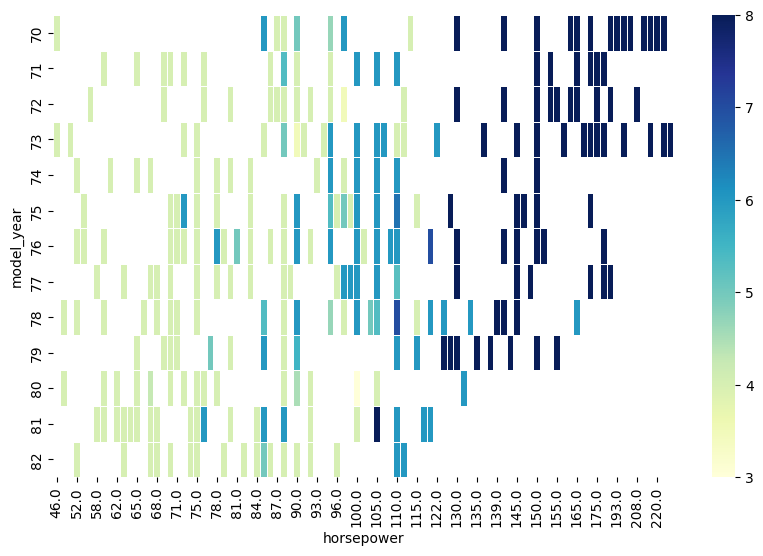

In [209]:
df_grouped = df.groupby(['model_year', 'horsepower'], as_index=False)['cylinders'].mean()

pivot_table = df_grouped.pivot(index="model_year", columns="horsepower", values='cylinders')
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5, ax=ax)
plt.show()


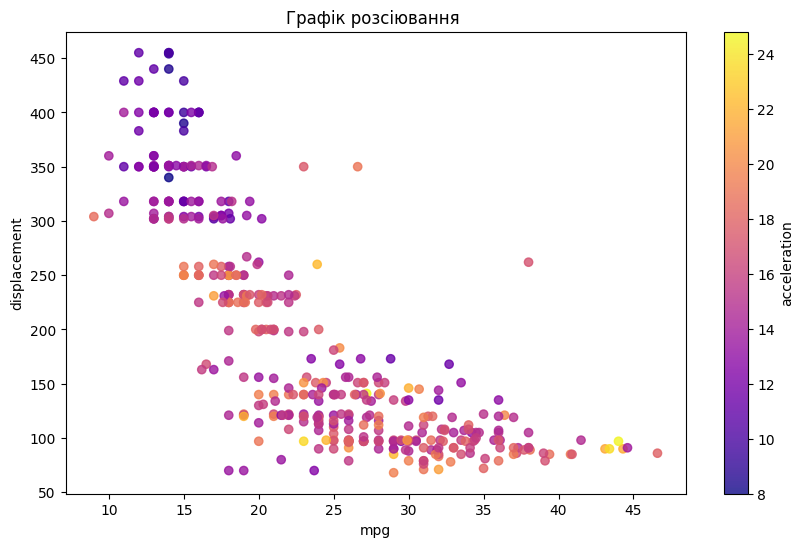

In [215]:
plt.figure(figsize=(10, 6))
plt.scatter(df['mpg'], df['displacement'], c=df['acceleration'], cmap='plasma', alpha=0.8)
plt.xlabel('mpg')
plt.ylabel('displacement')
plt.title('Графік розсіювання ')
plt.colorbar(label='acceleration')
plt.show()
